In [143]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [144]:
import pandas as pd
df = pd.read_excel('/content/gdrive/MyDrive/globalterrorismdb_new1.xlsx')

In [145]:
df.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,province/ state,city,...,targsubtype1,targsubtype1_txt,corp1,target1,nationality,nationality_txt,individual,claimed,weaptype1,weaptype_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,0,NaN,13,Unknown
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,0,NaN,13,Unknown
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,0,NaN,13,Unknown
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,0,NaN,6,Explosives
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,0,NaN,8,Incendiary


In [146]:
df = df.drop(columns=['targsubtype1','targsubtype1_txt','corp1','target1'])

In [147]:
df[['claimed']]=df[['claimed']].fillna(value = 0)

In [148]:
df[['claimed',]]

,claimed
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
181686,1.0
181687,0.0
181688,0.0
181689,0.0


In [149]:
df.drop(df[(df['province/ state'] == 'Unknown') | (df['city'] == 'Unknown')].index, inplace= True)
df.head(20)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,province/ state,city,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,nationality,nationality_txt,individual,claimed,weaptype1,weaptype_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic,0,0.0,13,Unknown
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium,0,0.0,13,Unknown
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,0.0,6,Explosives
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States,0,0.0,8,Incendiary
5,197001010002,1970,1,1,217,United States,1,North America,Illinois,Cairo,...,2,Armed Assault,3,Police,217.0,United States,0,0.0,5,Firearms
6,197001020001,1970,1,2,218,Uruguay,3,South America,Montevideo,Montevideo,...,1,Assassination,3,Police,218.0,Uruguay,0,0.0,5,Firearms
7,197001020002,1970,1,2,217,United States,1,North America,California,Oakland,...,3,Bombing/Explosion,21,Utilities,217.0,United States,0,0.0,6,Explosives
8,197001020003,1970,1,2,217,United States,1,North America,Wisconsin,Madison,...,7,Facility/Infrastructure Attack,4,Military,217.0,United States,0,1.0,8,Incendiary
9,197001030001,1970,1,3,217,United States,1,North America,Wisconsin,Madison,...,7,Facility/Infrastructure Attack,2,Government (General),217.0,United States,0,0.0,8,Incendiary
10,197001050001,1970,1,1,217,United States,1,North America,Wisconsin,Baraboo,...,3,Bombing/Explosion,4,Military,217.0,United States,0,0.0,6,Explosives


In [150]:
a = df.groupby('iyear', as_index =False).count()
a['eventid']

0       642
1       460
2       546
3       463
4       571
5       724
6       889
7      1277
8      1432
9      2408
10     2491
11     2373
12     2295
13     2559
14     3043
15     2435
16     2593
17     2847
18     3373
19     3993
20     3501
21     4165
22     4577
23     3114
24     2768
25     2623
26     2744
27      861
28     1279
29     1719
30     1816
31     1273
32     1224
33     1095
34     1898
35     2602
36     2997
37     4681
38     4667
39     4765
40     4904
41     8004
42    11298
43    16093
44    14229
45    12989
46    10534
Name: eventid, dtype: int64

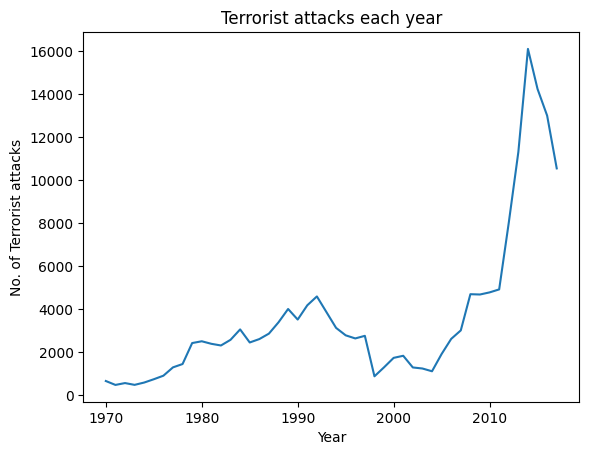

In [151]:
x = a['iyear']
y = a['eventid']
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('No. of Terrorist attacks')
plt.title('Terrorist attacks each year')
plt.show()



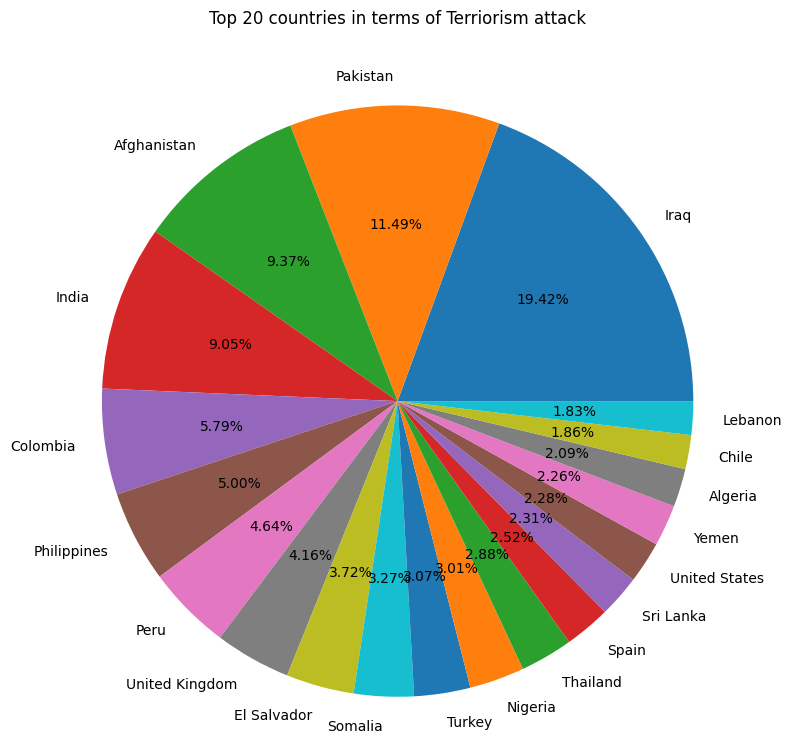

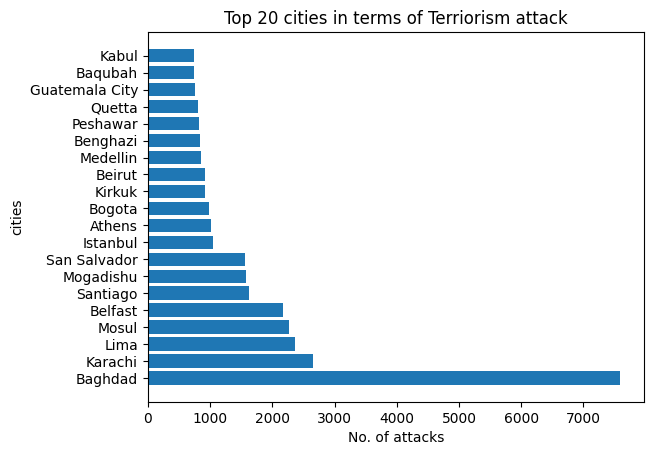

In [152]:
b=df.groupby('country_txt',as_index=False).count()
b=b.sort_values(by='eventid',ascending= False).head(20)
l = b['eventid']
m = b['country_txt']

c=df.groupby('city',as_index=False).count()
c=c.sort_values(by='eventid',ascending= False).head(20)
p= c['eventid']
q= c['city']

plt.pie(l,labels=m,autopct='%.2f%%',radius=2)
plt.title('Top 20 countries in terms of Terriorism attack', y = 1.5)
plt.show()

plt.barh(q,p)
plt.title('Top 20 cities in terms of Terriorism attack')
plt.xlabel('No. of attacks')
plt.ylabel('cities')
plt.show()


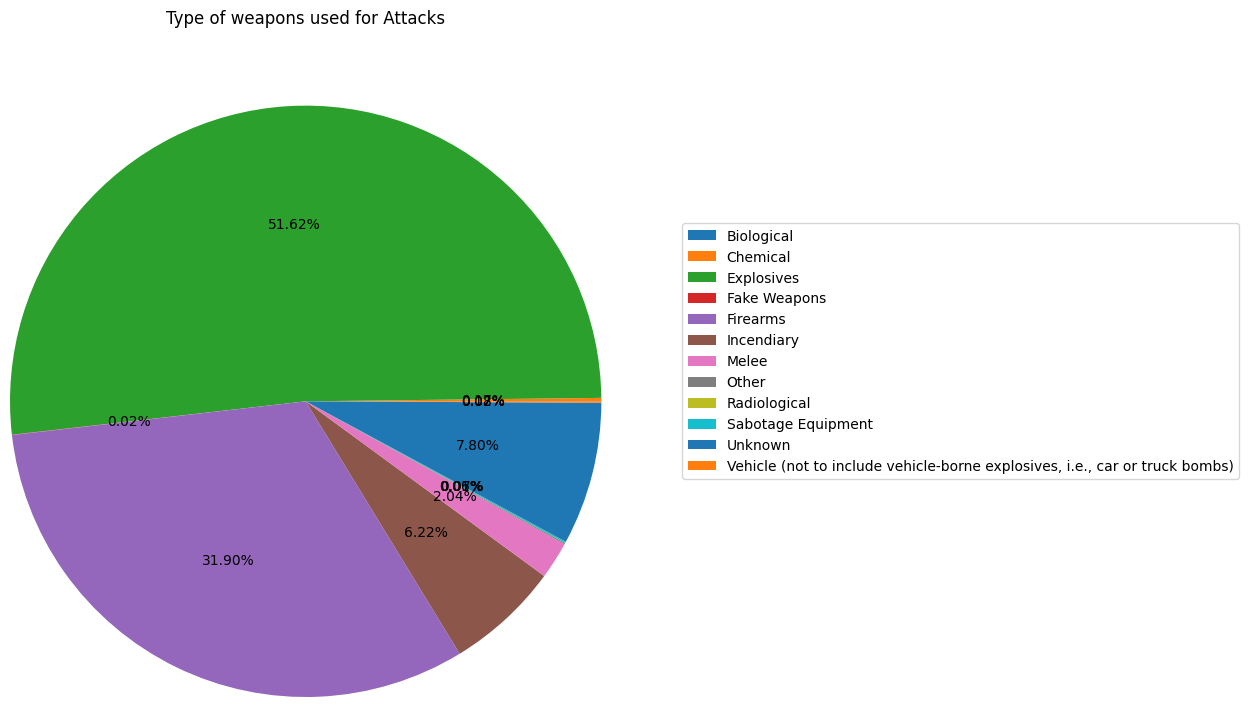

In [153]:
d=df.groupby('weaptype_txt',as_index=False).count()
r = d['weaptype_txt']
s = d['eventid']
plt.pie(s,radius= 2,autopct='%.2f%%')
plt.legend(r,bbox_to_anchor=(1.5,1))
plt.title('Type of weapons used for Attacks', y= 1.5)
plt.show()


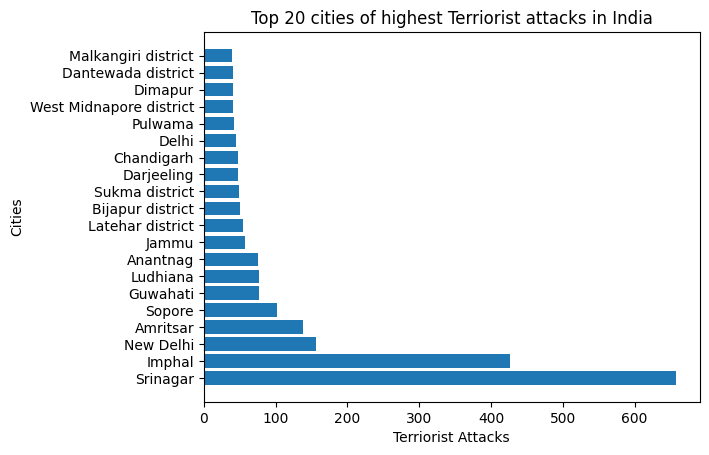

In [154]:
e = df[df['country_txt']=='India'].groupby('city',as_index= False).count()
e = e.sort_values(by = 'eventid', ascending = False).head(20)
u = e['city']
v = e['eventid']
plt.barh(u,v)
plt.xlabel('Terriorist Attacks')
plt.ylabel('Cities')
plt.title('Top 20 cities of highest Terriorist attacks in India')
plt.show()

note - hotspot of attacks can also be found out using the latitude and longitude columns plotted on scatter plot